In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import lasio
import shap
import datetime as dt

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
params = {}

In [3]:
feature_list = ['DRES', 'DT', 'GR', 'DEN', 'COND', 'NPO']

In [4]:
train_X = pd.read_csv("./data/train/train_x_2021-04-13.csv", index_col=0).sample(frac=1, random_state=1)
train_y = pd.read_csv("./data/train/train_y_2021-04-13.csv", index_col=0).sample(frac=1, random_state=1)

test_x = pd.read_csv("./data/test/test_x_2021-04-13.csv", index_col=0).sample(frac=1, random_state=1)
test_y = pd.read_csv("./data/test/test_y_2021-04-13.csv", index_col=0).sample(frac=1, random_state=1)

In [5]:
train_X = train_X[feature_list]
test_x = test_x[feature_list]

In [6]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

In [7]:
input_neuron = len(test_x.columns)

In [8]:
# 40 minutes for >120,000 rows and 8 train columns, 1000 epochs

## Setup the model for training.
classifier = Sequential()
classifier.add(Dense(output_dim = 250, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 75, init = 'uniform', activation = 'relu'))
#classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ["mae"])
history = classifier.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_split= 0.3)

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=250, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=75, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`



Train on 253917 samples, validate on 108823 samples
Epoch 1/30
253917/253917 [==============================] - 5s 22us/step - loss: 0.4756 - mae: 0.4424 - val_loss: 0.2831 - val_mae: 0.3022
Epoch 2/30
253917/253917 [==============================] - 5s 21us/step - loss: 0.2742 - mae: 0.2882 - val_loss: 0.2616 - val_mae: 0.2821
Epoch 3/30
253917/253917 [==============================] - 5s 21us/step - loss: 0.2580 - mae: 0.2764 - val_loss: 0.2524 - val_mae: 0.2764
Epoch 4/30
253917/253917 [==============================] - 5s 21us/step - loss: 0.2483 - mae: 0.2713 - val_loss: 0.2412 - val_mae: 0.2683
Epoch 5/30
253917/253917 [==============================] - 6s 22us/step - loss: 0.2411 - mae: 0.2682 - val_loss: 0.2371 - val_mae: 0.2654
Epoch 6/30
253917/253917 [==============================] - 5s 21us/step - loss: 0.2351 - mae: 0.2653 - val_loss: 0.2310 - val_mae: 0.2676
Epoch 7/30
253917/253917 [==============================] - 5s 21us/step - loss: 0.2301 - mae: 0.2631 - val_loss:

In [9]:
if os.path.exists("./model") is False:
    os.mkdir("./model")
pickle.dump(classifier, open("./model/ReinNN_Quad_21_" + str(dt.datetime.today().strftime('%Y-%m-%d'))+ ".pkl", "wb"))

In [10]:
#classifier = pickle.load(open("./model/ReinNN.pkl", "rb"))

In [11]:
X_rand = train_X.sample(frac=0.013, random_state=42)

rand_X = sc_x.fit_transform(X_rand)
len(rand_X)

4716

In [12]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.DeepExplainer(classifier, rand_X)
shap_values = explainer.shap_values(rand_X)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


keras is no longer supported, please use tf.keras instead.


In [13]:
#del train_X['deaths_pred']
names= train_X.columns.to_list()
#names = 
names

['DRES', 'DT', 'GR', 'DEN', 'COND', 'NPO']

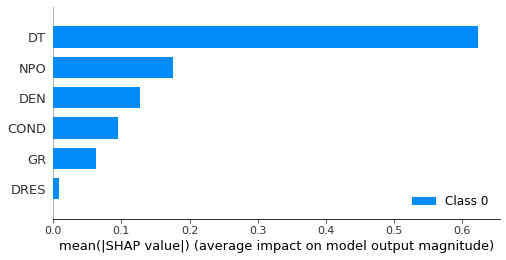

In [14]:
shap.summary_plot(shap_values, rand_X, names, plot_type="bar", show=False)
folder_create = os.path.exists("images")
if folder_create is False:
    os.mkdir("./images")
plt.savefig('./images/SHAP_Feature_Score_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')

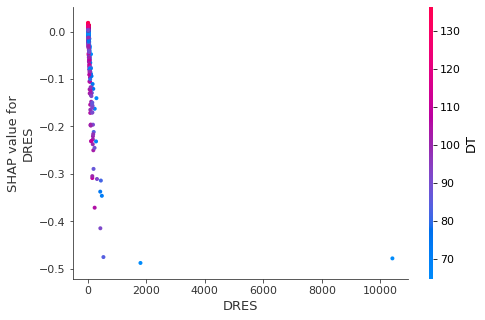

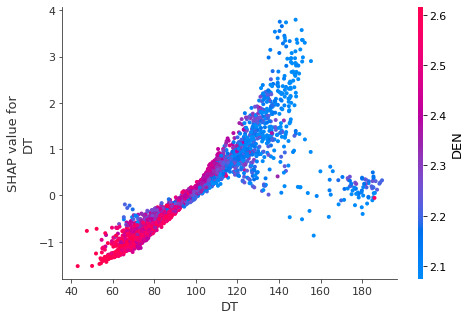

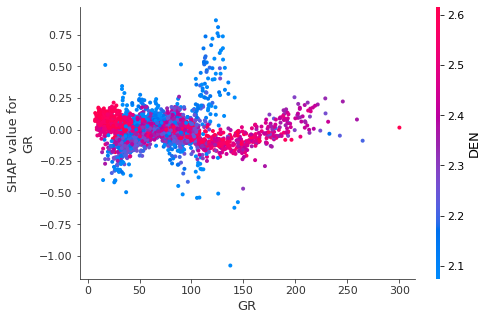

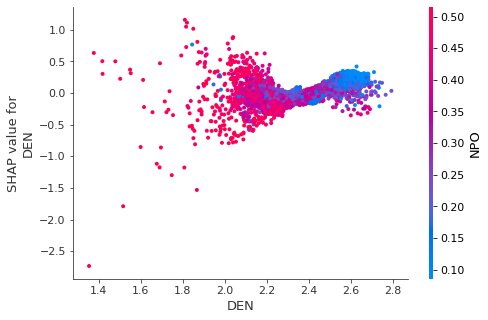

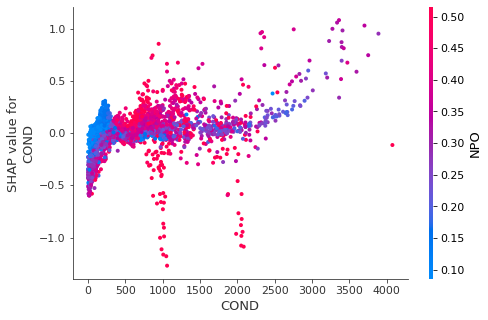

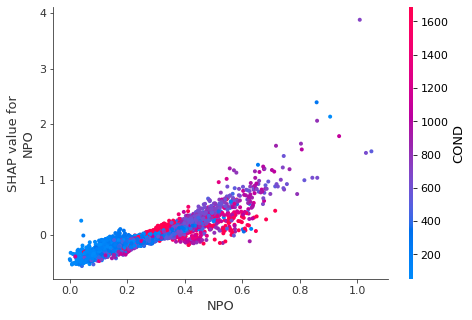

In [15]:
for i in names:
    # SHAP asigned value for an input parameter vs its value. Coloured by a random input feature
    shap.dependence_plot(i, shap_values[0], X_rand)

In [16]:
shap.force_plot(explainer.expected_value, shap_values[0], train_X)

shap.force_plot is slow for many thousands of rows, try subsampling your data.


In [17]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], train_X.iloc[0,:], link="logit")

In [18]:
test_x["DTS_pred"] = sc_y.inverse_transform(classifier.predict(X_test))

In [19]:
df = pd.concat([test_x, test_y], axis=1)
df["model_error"] = df.DTS -  df.DTS_pred

In [20]:
print(f"Neural Net MAE score: {np.round(mean_absolute_error(df.DTS, df.DTS_pred))}")
print(f"Neural Net R2 score: {np.round(r2_score(df.DTS, df.DTS_pred), 4)}")

Neural Net MAE score: 27.0
Neural Net R2 score: 0.6261


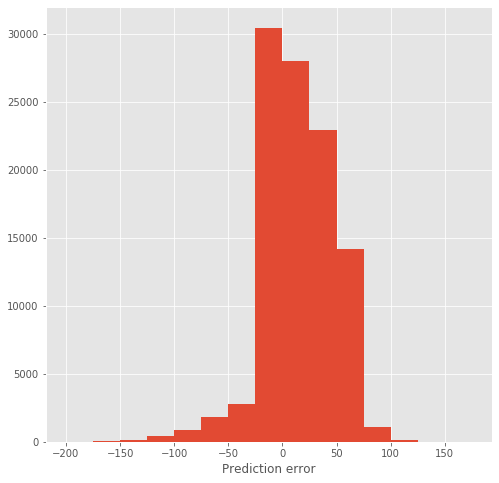

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.hist(df["model_error"], bins=np.arange(-200, 200,25))
plt.xlabel("Prediction error")
folder_create = os.path.exists("images")
if folder_create is False:
    os.mkdir("./images")
plt.savefig('./images/Erro_Histogram_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')

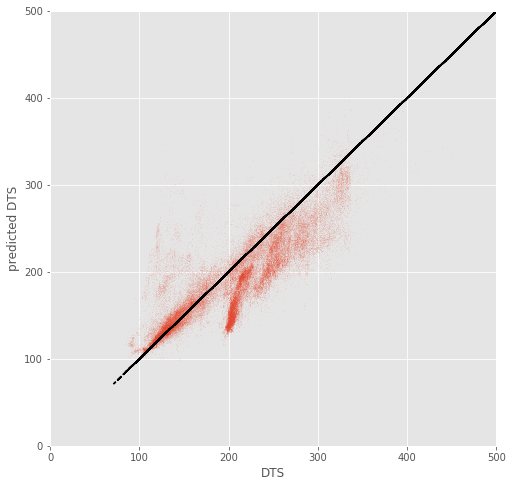

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(df.DTS, df.DTS_pred, s=0.001)
plt.plot(df.DTS, df.DTS, color="black", linestyle="--")
plt.ylim(0, 500)
plt.xlim(0, 500)
plt.xlabel("DTS")
plt.ylabel("predicted DTS")
folder_create = os.path.exists("images")
if folder_create is False:
    os.mkdir("./images")
plt.savefig('./images/Real_vs_Predicted_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')

In [23]:
### Import master df
df_global = pd.read_csv("Quad21_clean.csv", index_col=0)
df_features = df_global[feature_list].copy()
df_dts = df_global.drop(feature_list, axis=1)

In [24]:
### Create scaled array of full df
sc_df = StandardScaler()
df_global_sc = sc_df.fit_transform(df_features)

In [25]:
### Predict shear using model
df_global['DTS_Pred'] = sc_y.inverse_transform(classifier.predict(df_global_sc))
### Use a linear prediction based on ypical values used by a petrophysicist in Quad 21
df_global['DTS_linear'] = (df_global['DT'] * 1.590416) - 1
### Merge and predict the error
df_global.merge(df_dts['DTS'])
df_global['DTS_Pred_Error'] = df_global['DTS_Pred'] - df_global['DTS']

In [26]:
df_global['model_error'] = df_global['DTS'] - df_global['DTS_Pred']
df_global['linear_error'] = df_global['DTS'] - df_global['DTS_linear']

In [27]:
df_global.head(2)

Wellname   Depth       GR     NPO      CAL     DRES     COND  \
973542  13-22c-30  8001.5  94.3394  0.2543  11.8982  13.5483  73.8100   
973543  13-22c-30  8002.0  85.8017  0.2122  11.9270  13.1327  76.1458   

           MRES     SRES       DT     DEN    PEF       DTS    DTS_Pred  \
973542  27.1916  44.2099  81.6508  2.4825  3.395  139.1937  154.087158   
973543  34.8896  49.4245  85.8908  2.5292  2.960  139.9702  162.442886   

        DTS_linear  DTS_Pred_Error  model_error  linear_error  
973542  128.858739       14.893458   -14.893458     10.334961  
973543  135.602103       22.472686   -22.472686      4.368097

In [34]:
#top_count = test_x.groupby('Wellname')['DTS'].mean().sort_values()#.iloc[5:-5]
#top_count = list(top_count.keys())
top_count = ['205-27-2', '14-26a-8', '13-23b-5', '15-28a-8', '15-20b-15', '15-20b-11z', '14-26b-5', '14-26a-6', '204-23-2', '14-20b-32', '205-1-1', '204-18-1', '13-24a-4', '21-12-3', '21-24-6']

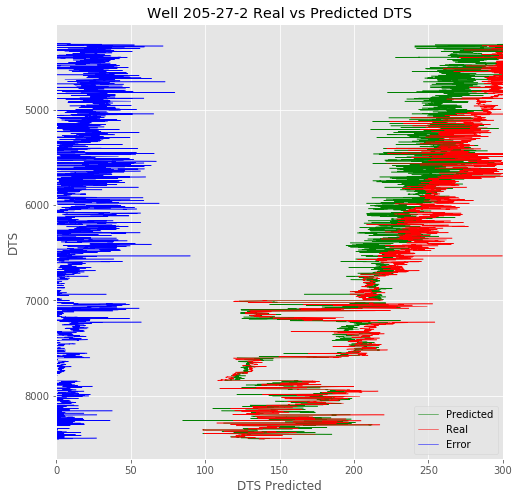

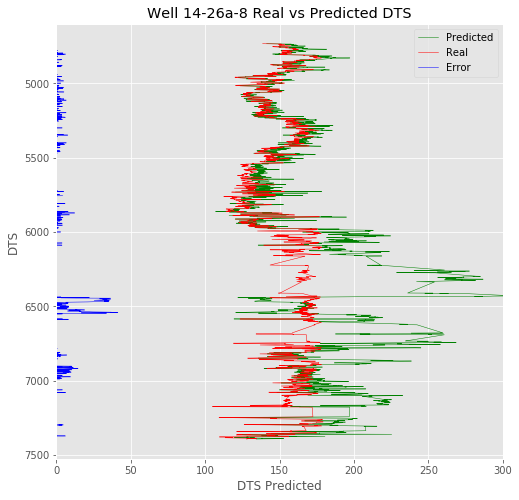

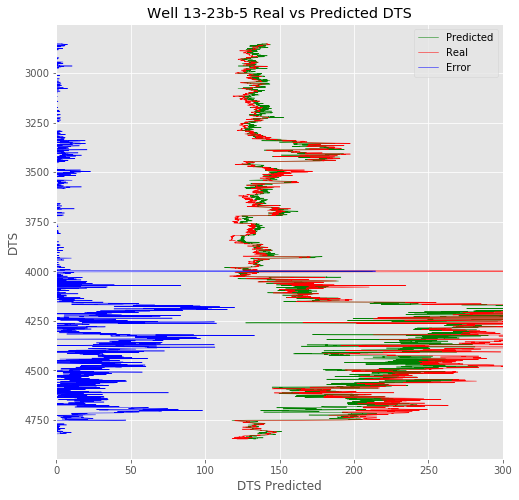

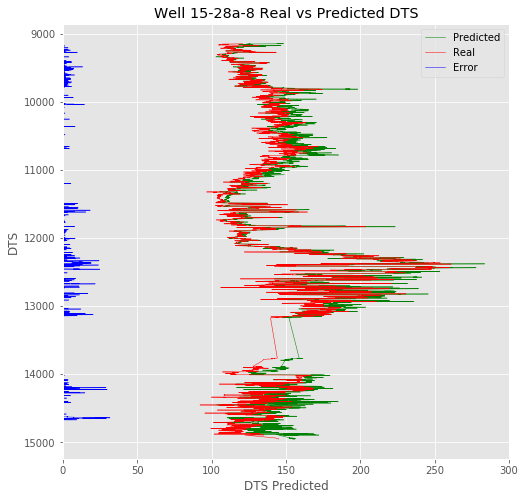

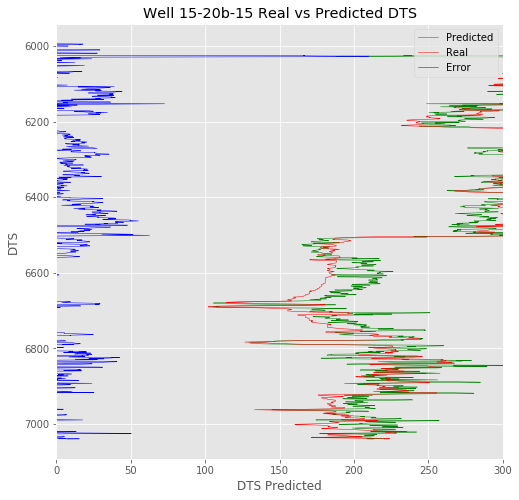

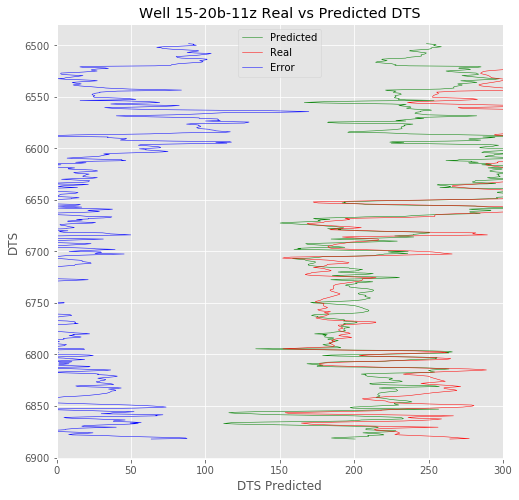

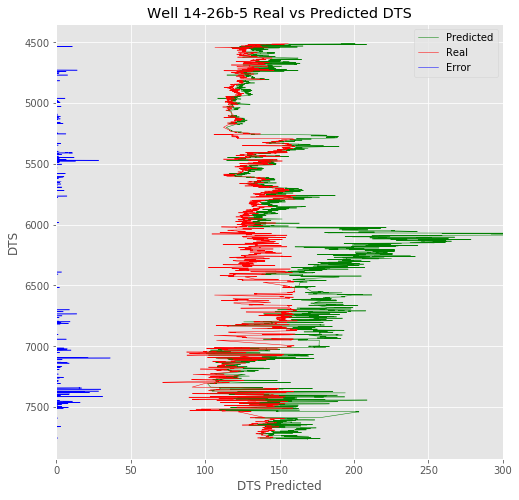

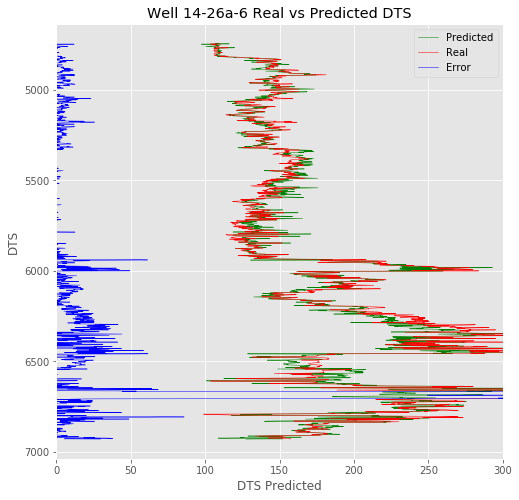

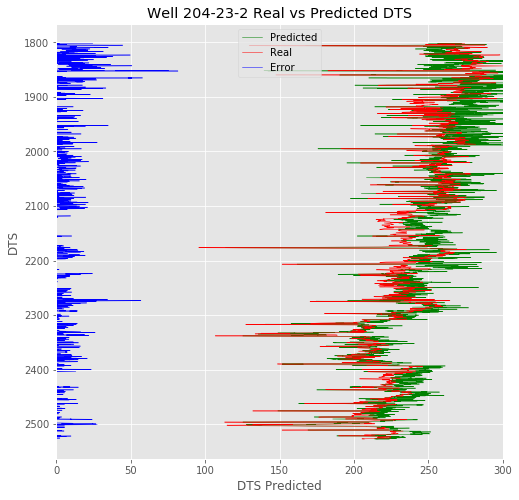

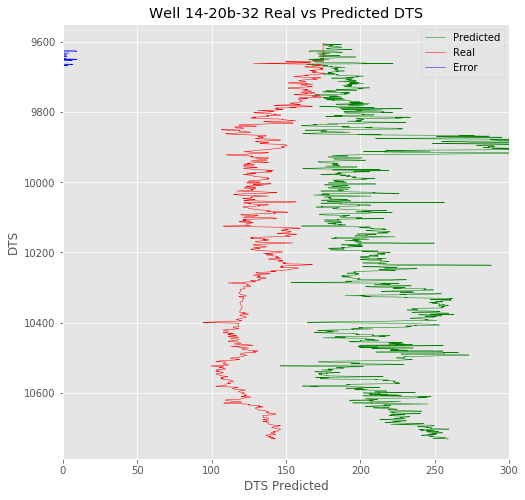

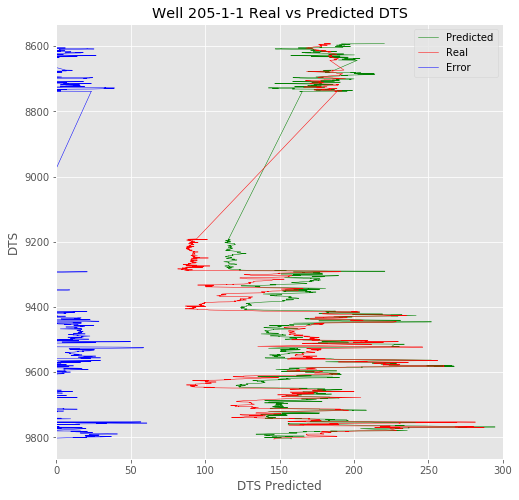

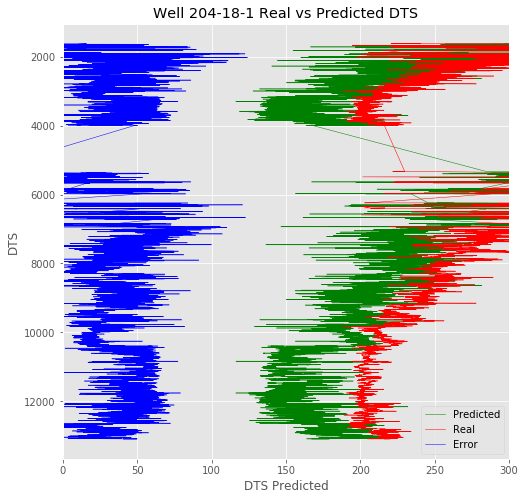

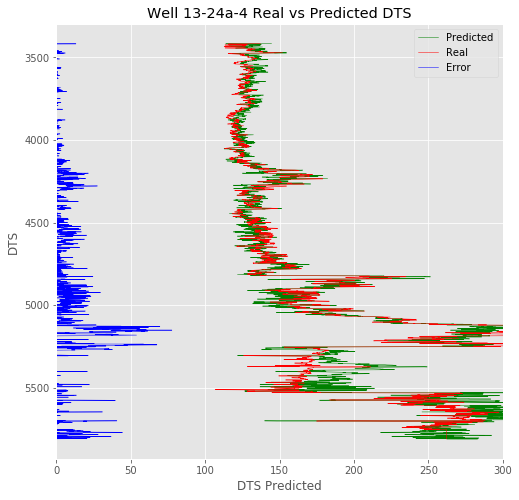

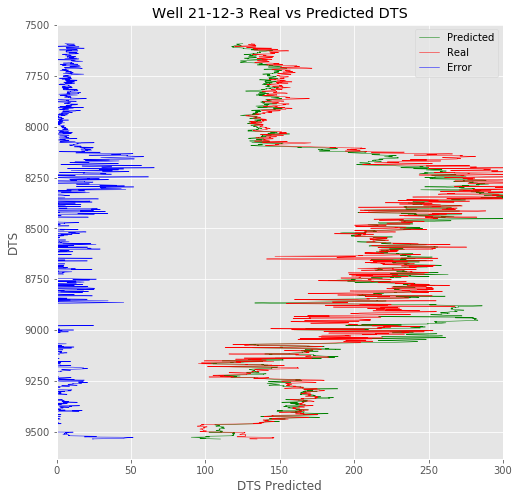

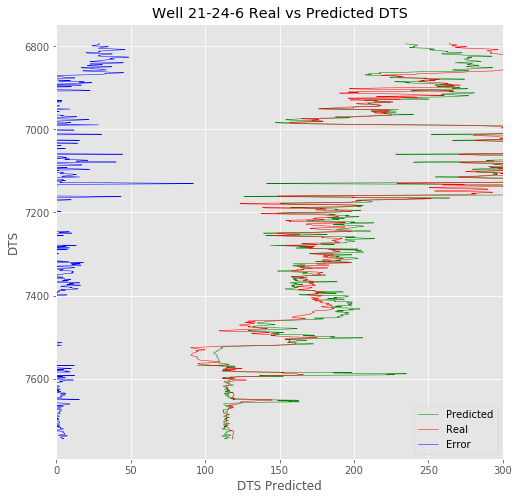

In [35]:
for well in top_count[:100]:
    plt.figure(figsize=(8, 8))
    plt.plot(df_global.loc[df_global['Wellname']==well]['DTS_Pred'], df_global.loc[df_global['Wellname']==well]['Depth'], color='green', linewidth=0.5, label='Predicted')
    plt.plot(df_global.loc[df_global['Wellname']==well]['DTS'], df_global.loc[df_global['Wellname']==well]['Depth'], color="red", linewidth=0.5, label='Real') #linestyle="--")
    plt.plot(df_global.loc[df_global['Wellname']==well]['model_error'], df_global.loc[df_global['Wellname']==well]['Depth'], color="blue", linewidth=0.5, label='Error') #linestyle="--")
    
    plt.xlim(0, 300)
    #plt.xscale('log')
    #plt.ylim(5000, 15500)
    plt.title('Well ' + well + ' Real vs Predicted DTS')
    plt.xlabel("DTS Predicted")
    plt.ylabel("DTS")
    plt.gca().invert_yaxis()
    plt.legend()
    #plt.savefig(str(well) + '_Real_vs_Predicted_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')
    plt.show()

In [37]:
print(f"XGBoost MAE score: {np.round(mean_absolute_error(df_global['DTS'], df_global['DTS_Pred']))}")
print(f"XGBoost R2 score: {np.round(r2_score(df_global['DTS'], df_global['DTS_Pred']), 4)}")

XGBoost MAE score: 19.0
XGBoost R2 score: 0.7596


In [38]:
KDE = df_global[['DT', 'DTS', 'DTS_Pred', 'DTS_linear']]

The following kwargs were not used by contour: 'edgecolor', 'linewidth'


<Figure size 800x800 with 0 Axes>

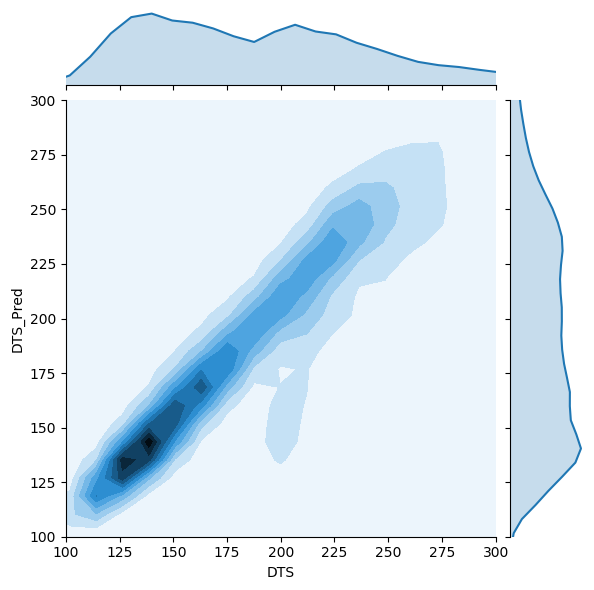

In [41]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(8, 8))
plot = sns.jointplot(x=df_global["DTS"], y=df_global["DTS_Pred"], kind='kde', edgecolor="skyblue", linewidth=2)
#plt.plot(df.DTS, df.DTS, color="black", linestyle="--")
plot.ax_marg_x.set_xlim(100, 300)
plot.ax_marg_y.set_ylim(100, 300)
#sns.ylim(100, 300)
#sns.xlim(0, 400)
plt.savefig('./images/Real_vs_Predicted_DensityPlot_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')

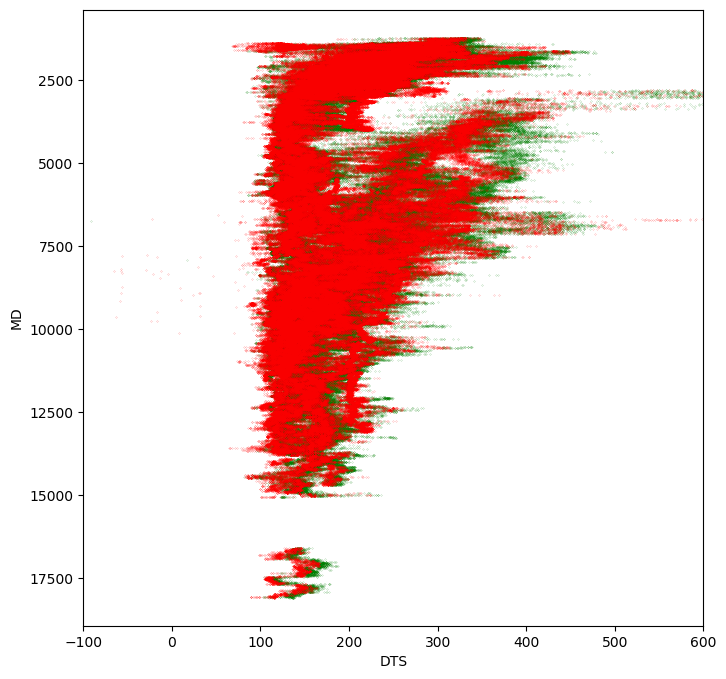

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(df_global['DTS_Pred'], df_global['Depth'], s=0.01, color='green', label='Predicted')
plt.scatter(df_global['DTS'], df_global['Depth'], color="red", s=0.01, label='Real') #linestyle="--")


plt.xlim(-100, 600)
#plt.ylim(5000, 15500)
plt.xlabel("DTS")
plt.ylabel("MD")
plt.gca().invert_yaxis()

plt.savefig('DTS_vs_DTSpred_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')
plt.show()